In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr

%matplotlib inline

In [2]:
#f = xr.open_dataset('atn_deployment.nc')
#f = xr.open_dataset('dt_CREMP_Rev_OBIS_Occurrence_v2_3_1_2007_943b_fba4_b799.nc')
f = xr.open_dataset('../data/deployment_km_greyseal_v1.nc')

In [3]:
f

<xarray.Dataset>
Dimensions:               (obs: 2216)
Coordinates:
    time                  (obs) datetime64[ns] ...
    z                     (obs) float64 ...
    lat                   (obs) float64 ...
    lon                   (obs) float64 ...
Dimensions without coordinates: obs
Data variables: (12/21)
    trajectory            object ...
    location_class        (obs) object ...
    deploy_id             (obs) float64 ...
    instrument_tag        (obs) object ...
    type                  (obs) object ...
    error_radius          (obs) float64 ...
    ...                    ...
    taxon_name            (obs) object ...
    taxon_lsid            (obs) object ...
    qartod_rollup_flag    (obs) float64 ...
    qartod_speed_flag     (obs) float64 ...
    qartod_location_flag  (obs) float64 ...
    qartod_time_flag      (obs) float64 ...
Attributes: (12/70)
    date_created:                    2020-08-25T00:04:17Z
    featureType:                     trajectory
    cdm_data_type:                   Trajectory
    geospatial_bounds_vertical_crs:  EPSG:4326
    geospatial_lat_units:            degrees_north
    geospatial_lon_units:            degrees_east
    ...                              ...
    vendor:                          Wildlife Computers
    vendor_id:                       5e32f4e46321be14905ea848
    wmo_platform_code:               99nnnnn
    summary:                         Wildlife Computers SPOT293 tag deployed ...
    title:                           Grey seal (Halichoerus grypus) location ...
    sea_name:                        Stellwagen Bank National Marine Sanctuar...

In [40]:
# Make this respond in ncdump format.
# double time(obs) ;
print('\033[4m'+'\nvariables:'+'\033[0m')
for var in f.variables:
    print('\033[1m'+var+'\033[0m'+' ('+','.join(f.variables[var].dims)+') ;')
    for key in f.variables[var].attrs:
        print('\t%s = %s ;' % (key,f.variables[var].attrs[key]))
    #f.variables['time'].attrs
print('\n\033[4m'+'global attributes:'+'\033[0m')
for key in f.attrs:
    print("\t:%s = %s ;" % (key, f.attrs[key]))


variables:
trajectory () ;
	cf_role = trajectory_id ;
	long_name = trajectory identifier ;
time (obs) ;
	standard_name = time ;
	axis = T ;
	_CoordinateAxisType = Time ;
	ioos_category = Time ;
	long_name = Time ;
	actual_min = 2020-01-30T15:05:34Z ;
	actual_max = 2020-06-15T23:16:37Z ;
z (obs) ;
	axis = Z ;
	long_name = depth ;
	positive = down ;
	standard_name = depth ;
	units = m ;
	actual_min = 0.0 ;
	actual_max = 0.0 ;
	instrument = instrument_pressure ;
	platform = platform ;
lat (obs) ;
	axis = Y ;
	_CoordinateAxisType = Lat ;
	ioos_category = Location ;
	long_name = Profile Location ;
	standard_name = latitude ;
	units = degrees_north ;
	valid_max = 90.0 ;
	valid_min = -90.0 ;
	actual_min = 40.2363 ;
	actual_max = 43.8355 ;
	instrument = instrument_location ;
	platform = platform ;
lon (obs) ;
	axis = X ;
	_CoordinateAxisType = Lon ;
	ioos_category = Location ;
	long_name = Profile Location ;
	standard_name = longitude ;
	units = degrees_east ;
	valid_max = 180.0 ;
	valid_min 

In [3]:
f.info()

xarray.Dataset {
dimensions:
	obs = 2216 ;

variables:
	object trajectory() ;
		trajectory:cf_role = trajectory_id ;
		trajectory:long_name = trajectory identifier ;
	datetime64[ns] time(obs) ;
		time:standard_name = time ;
		time:axis = T ;
		time:_CoordinateAxisType = Time ;
		time:ioos_category = Time ;
		time:long_name = Time ;
		time:actual_min = 2020-01-30T15:05:34Z ;
		time:actual_max = 2020-06-15T23:16:37Z ;
	float64 z(obs) ;
		z:axis = Z ;
		z:long_name = depth ;
		z:positive = down ;
		z:standard_name = depth ;
		z:units = m ;
		z:actual_min = 0.0 ;
		z:actual_max = 0.0 ;
		z:instrument = instrument_pressure ;
		z:platform = platform ;
	float64 lat(obs) ;
		lat:axis = Y ;
		lat:_CoordinateAxisType = Lat ;
		lat:ioos_category = Location ;
		lat:long_name = Profile Location ;
		lat:standard_name = latitude ;
		lat:units = degrees_north ;
		lat:valid_max = 90.0 ;
		lat:valid_min = -90.0 ;
		lat:actual_min = 40.2363 ;
		lat:actual_max = 43.8355 ;
		lat:instrument = instrument_loc

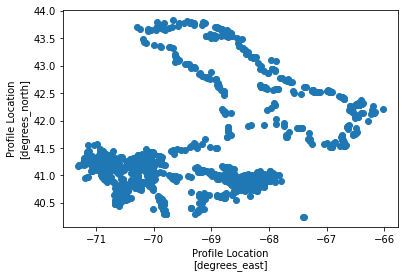

In [7]:
f.plot.scatter('lon','lat')

In [6]:
import folium
from folium.plugins import Fullscreen

map = folium.Map(location=[f.lat.mean(), f.lon.mean()], zoom_start=1)
Fullscreen().add_to(map)

for i in range(0,len(f.lat.data)):
    folium.Circle(
        location=[f.lat.data[i],f.lon.data[i]],
        radius = 5,
        popup = f.platform.species,
    ).add_to(map)
map

In [ ]:
from folium.plugins import HeatMapWithTime
from folium.plugins import Fullscreen

map1 = folium.Map(location=[f.lat.mean(), f.lon.mean()], zoom_start=1)
Fullscreen().add_to(map1)

HeatMapWithTime([f.lat.data,f.lon.data],radius=5,auto_play=True,position='bottomright').add_to(map1)

map1

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

f.plot.scatter(x='lon',y='lat')

## Attempt to animate tracks
uses code from https://nbviewer.jupyter.org/github/ocefpaf/notebooks_demos/blob/HS20/notebooks/2020-11-18-Hurricane_Season-2020.ipynb

In [ ]:
import pandas as pd
gliders = f.to_dataframe()
gliders['time']=pd.to_datetime(gliders['time'])
gliders = gliders.set_index('time')
gliders

In [ ]:
min_lon, max_lon, min_lat, max_lat = bbox  = -155, -150, 58, 60#
#min_lon, max_lon, min_lat, max_lat = bbox  = f.lon.min(), f.lon.max(), f.lat.min(), f.lat.max()
min_time = pd.to_datetime(f.time.min().values)
max_time = pd.to_datetime(f.time.max().values)

In [ ]:
from pathlib import Path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = Path.home().joinpath("cartopy_stockimages")

def make_map(figsize=(12, 12), projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(
        subplot_kw={"projection": projection},
        figsize=figsize,
    )
    ax.set_extent(bbox)
    ax.coastlines()
    fname = image_path.joinpath("HYP_LR_SR_OB_DR.tif")
    ax.imshow(imread(fname), origin="upper", transform=projection, extent=[-180, 180, -90, 90])
    return fig, ax

In [ ]:
# We will interpolate all data to 6 hours interval
# glider data is approximately a few minutes while track data is every 6 hours
# new_index = pd.date_range(min_time, max_time, freq="6h")


# def reindex_and_interpolate(df, new_index):
#     return df.reindex(df.index | new_index).interpolate(method="pad", limit_direction="forward", limit=1).loc[new_index]


# inter_gliders = {}
# for glider, df in gliders.items():
#     # Some delayed gliders have duplicated index.
#     df = df.drop_duplicates()
#     df = reindex_and_interpolate(df, new_index)
#     inter_gliders.update({glider: df})

inter_gliders = gliders

In [ ]:
fig, ax = make_map()

ax.plot(inter_gliders["lon"], inter_gliders["lat"], color='orange', linestyle="none", marker=".")

In [ ]:
import numpy as np
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LinearSegmentedColormap


fig, ax = make_map()

title = ax.text(
    0.5, 1.05, "",
    bbox={"facecolor": "w", "alpha": 0.5, "pad":5},
    transform=ax.transAxes, ha="center"
)

# lines = []
# for track in inter_tracks.keys():
#     line, = ax.plot([], [], color=colors[1], marker=".", linestyle="-")
#     lines.append(line)



def init():
    ax.set_xlim(min_lon, max_lon)
    ax.set_ylim(min_lat, max_lat)
    return title,


intensity_glider = []
x_glider, y_glider = [], []
#cmap_glider = make_colors(colors[0])
scatter_glider = ax.scatter([], [], s=10, c=[], vmin=0, vmax=1)
def update_glider(k):
    global scatter_glider, intensity_glider, x_glider, y_glider
    x, y = [], []
    df = inter_gliders
    #for glider, df in inter_gliders.items():
    #print(glider)
    #print(df)
    point = df.iloc[k]
    #print(point)
    x.append(point["lon"])
    y.append(point["lat"])
    x_glider.extend(x)
    y_glider.extend(y)
    arr = np.c_[x_glider, y_glider]
    scatter_glider.set_offsets(arr)
    intensity_glider = np.concatenate((np.array(intensity_glider)*0.80, np.ones(len(x))))
    scatter_glider.set_array(intensity_glider)
    return scatter_glider,

def update(k):
    update_glider(k)
    title.set_text(inter_gliders.index[k])
    return title,


anim = FuncAnimation(fig, update, init_func=init, frames=len(inter_gliders.index), blit=True);
plt.close()  # remove the extra frame output.

In [ ]:
HTML(anim.to_html5_video())